# Linear Neural Networks(2)

## 3.4 Softmax Regression

1. regression vs classification
* regression : predicting the number of dollars (price) at which a house will be sold(**how much?**)
* classification : Which movie is Aston most likely to watch next?(**which one?**)

2. classification notation

one-hot encoding : a vector with as many components as we have categories. The component corresponding to particular instance's category is set to 1 and all other components are set to 0.
In our case, a label y would be a three-dimensional vector, with (1, 0, 0) corresponding to "cat", (0, 1, 0) to "chicken", and (0, 0, 1) to "dog":
$$ y ∈ {(1, 0, 0), (0, 1, 0), (0, 0, 1)}$$

3. Network Architecture

In our case, since we have 4 features and 3 possible output categories, we will need 12 scalars to represent the weights, and 3 scalars to represent the biases. We compute these three logits for each input:
$$ o_1 = x_1 w_{11} + x_2 w_{12} + x_3 w{13} + x_4 w{14} + b_1,$$
$$ o_2 = x_1 w{21} + x_2 w_{22} + x_3 w{23} + x_4 w{24} + b_2, $$
$$ o_3 = x_1 w{31} + x_2 w{32} + x_3 w{33} + x_4 w{34} + b_3.$$
=> fully-connected layer.
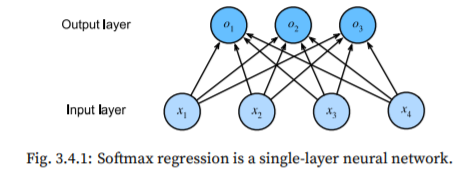

4. Parameterization Cost of Fully-Connected Layers

fully-connected layers are *fully* connected with potentially many learnable parameters.
any fully-connected layer with 𝓭 inputs and 𝓺 outputs, the parameterization cost is 𝒪(𝓭𝓺), whcih can be prohibitively high in practice.
Fortunately, this cost of transforming 𝓭 inputs into 𝓺 outputs can be reduced to 𝒪(𝓭𝓺/𝑛), where the hyperparameter 𝑛 can be flexibly specified by us to balance between parameter saving and model effectiveness in real-world applications(Zhang et al., 2021)

5. Softmax Operation

main goal is interpreting the outputs of our model as probabilities.

$$ \hat{y} = softmax(𝞸) where \hat{y}_j = \frac{exp(o_j)}{Σ_k exp(o_k)}$$

$$ argmax_{j}\hat{y}_j = aregmax_{j} o_j$$

6. Vectorization for Minibatches

minibatch 𝐗∈ℝ(nxd)

weights 𝐖∈ℝ(dxq)

bias 𝐛∈ℝ(1xq)

where n is batch size and d is feature dimensionality

6. Loss function

$$P(𝐘|𝐗) = ∏_{i=1}^{n}P(𝐲^{(i)}|𝒙^{(i)}). $$

According to maximum likelihood estimation, we maximize P(𝐘|𝐗), which is equivalent to minimizing the negative log-likelihood:

$$-logP(𝐘|𝐗)=Σ_{i=1}^{n}-logP(𝐲^{(i)}|𝒙^{(i)})=Σ_{i=1}^{n}𝑙(𝐲^{(i)}, \hat{𝐲}^{(i)}),  $$

where for any pair of label 𝐲 and model prediction y hat over 𝓺 classes, the loss function 𝑙 is

$$ 𝑙(𝐲, \hat{𝐲}) = - Σ_{j=1}^{q}y_jlog \hat{y}_j. (3.4.8)$$

(3.4.8) is called *cross-entropy loss*.
Since 𝐲 is a one-hot vector of length 𝓺, the sum over all its coordinates 𝓳 vanishes for all but one term. Since all y hat j are predicted probabilities, their logarithm is never larger than 0. Consequently, the loss function cannot be minimized any further if we correctly predict the actual label with certainty.

7. Softmax and Derivatives

$$𝑙(𝐲, \hat{𝐲})= - ∑_{j=1}^{q}y_jlog\frac{exp(o_j)}{∑_{k=1}^{q}exp(o_k)} $$
$$
= Σ_{j=1}^{q}y_jlog Σ_{k=1}^{q}exp(o_k)-Σ_{j=1}^{q}y_jo_j$$
$$=logΣ_{k=1}^{q}exp(o_k) - Σ_{j=1}^{q}y_jo_j. $$

$$∂_{o_j}𝑙(𝐲, \hat{𝐲})=\frac{exp(o_j)}{Σ_{k=1}^{q}exp(o_k)}-y_j=softmax(o)_j-y_j. $$ 

참고 : https://deepnotes.io/softmax-crossentropy

In any exponential family model, the gradients of the log-likelihood are given by **the difference between the observation y and estimate y_hat**


## Summary

* The softmax operation takes a vector and maps it into probabilities.

* Softmax regression applies to classification problems. It uses the probability distribution of the output class in the softmax operation.

* Cross-entropy is a good measure of the difference between two probability distributions. It measures the number of bits needed to encode the data given our model.

## 3.5 The Image Classification Dataset

In [ ]:
!pip install d2l==0.14.2

In [2]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [ ]:
# `ToTensor` converts the image data from PIL type to 32-bit floating point tensors. It divides all numbers by 255 so that all pixel values are between 0 and 1.
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train = True, transform=trans, download=True
)
mnist_test = torchvision.datasets.FashionMNIST(
    root = '../data', train = False, transform=trans, download=True
)

Fashion-MNIST
* 10 categories
* training set : 60000
* test set : 10000
* height : 28 pixels
* width : 28 pixels
* channel : 1
For brevity, throughout this book we store the shape of any image with height 𝒉 width 𝐰 pixels as 𝒉 x 𝐰 or (𝒉, 𝐰).

In [4]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [5]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [6]:
def get_fashion_mnist_labels(labels):
  """Return text labels for the Fashion-MNIST dataset."""
  text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
  return [text_labels[int(i)] for i in labels]

In [7]:
def show_images(imgs, num_rows, num_cols, titles = None, scale = 1.5):
  """Plot a list of images."""
  figsize = (num_cols * scale, num_rows * scale)
  _, axes = d2l.plt.subplots(num_rows, num_cols, figsize = figsize)
  axes = axes.flatten()
  for i, (ax, img) in enumerate(zip(axes, imgs)):
    if torch.is_tensor(img):
      # Tensor Image
      ax.imshow(img.numpy())
    else:
      # PIL Image
      ax.imshow(img)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if titles:
      ax.set_title(titles[i])
  return axes

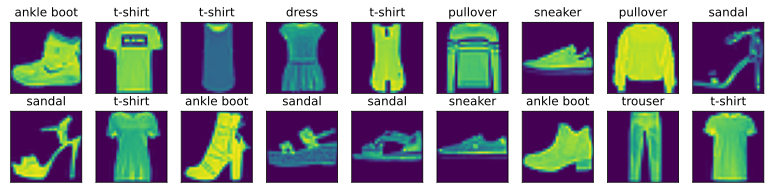

In [8]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size = 18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles = get_fashion_mnist_labels(y));

In [9]:
batch_size = 256

def get_dataloader_workers():
  """Use 4 processes to read the data."""
  return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle = True, num_workers = get_dataloader_workers())

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [10]:
timer = d2l.Timer()
for X, y in train_iter:
  continue
f'{timer.stop():.2f} sec'

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


'5.26 sec'

In [11]:
# It returns the data iterators for both the training set and validation set.
# In addition, it accepts an optional argument to resize images to another shape.
def load_data_fashion_mnist(batch_size, resize = None):
  """Download the Fashion-MNIST dataset and then load it into memory."""
  trans = [transforms.ToTensor()]
  if resize:
    trans.insert(0, transforms.Resize(resize))
  trans = transforms.Compose(trans)
  mnist_train = torchvision.datasets.FashionMNIST(
      root = '../data', train = True, transform = trans, download = True
  )
  mnist_test = torchvision.datasets.FashionMNIST(
      root = '../data', train = False, transform = trans, download = True
  )
  return (data.DataLoader(mnist_train, batch_size, shuffle = True, num_workers = get_dataloader_workers()),
          data.DataLoader(mnist_test, batch_size, shuffle=False, num_workers = get_dataloader_workers())
          )


In [12]:
train_iter, test_iter = load_data_fashion_mnist(32, resize = 64)
for X, y in train_iter:
  print(X.shape, X.dtype, y.shape, y.dtype)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


## Summary
* Fashion-MNIST is an apparel classification dataset consisting of images representing 10 categories. We will use this dataset in subsequent sections and chapters to evaluate various classification algorithms.

* We store the shape of any image with height h width w pixels as hxw or (h,w).

* Data iterators are a key component for efficient performance. Rely on well-implemented data iterators that exploit high-performance computing to avoid slowing down your training loop.

## 3.6 Implementation of Softmax Regression from Scratch

In [13]:
from IPython import display

In [14]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [15]:
# Initializing Model Parameters
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size = (num_inputs, num_outputs), requires_grad = True)
b = torch.zeros(num_outputs, requires_grad = True)

In [16]:
# Defining the Softmax Operation
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdim=True), X.sum(1, keepdim=True)

(tensor([[5., 7., 9.]]), tensor([[ 6.],
         [15.]]))

In [17]:
def softmax(X):
  X_exp = torch.exp(X)
  partition = X_exp.sum(1, keepdim=True)
  return X_exp / partition # The broadcasting mechanism is applied here

In [18]:
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.0394, 0.0279, 0.2945, 0.2660, 0.3722],
         [0.0767, 0.3793, 0.3032, 0.0751, 0.1657]]), tensor([1.0000, 1.0000]))

In [19]:
# Defining the model
def net(X):
  return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b )

In [20]:
# Defining the Loss function
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [21]:
def cross_entropy(y_hat, y):
  return -torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [22]:
# classification accuarcy
def accuracy(y_hat, y):
  """Compute the number of ccorrect predictions."""
  if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
    y_hat = y_hat.argmax(axis = 1)
  cmp = y_hat.type(y.dtype) == y
  return float(cmp.type(y.dtype).sum())

In [23]:
accuracy(y_hat, y) / len(y)

0.5

In [24]:
class Accumulator:
  """For accumulating sums over `n` variables."""
  def __init__(self, n):
    self.data = [0.0] * n
  
  def add(self, *args):
    self.data = [a + float(b) for a, b in zip(self.data, args)]
  
  def reset(self):
    self.data = [0.0] * len(self.data)

  def __getitem__(self, idx):
    return self.data[idx]

In [25]:
# evaluation/validation 과정에선 보통 model.eval()과 torch.no_grad()를 함께 사용함.
def evaluate_accuracy(net, data_iter):
  """Compute the accuracy for a model on a dataset."""
  if isinstance(net, torch.nn.Module):
    net.eval() # Set the model to evaluation mode # evaluation 과정에서 사용하지 않아야 하는 layer들을 알아서 off 시키도록 하는 함수
  metric = Accumulator(2) # No. of correct predictions, no. of predictions

  with torch.no_grad():
    for X, y in data_iter:
      metric.add(accuracy(net(X), y), y.numel())
  return metric[0] / metric[1]

In [26]:
evaluate_accuracy(net, test_iter)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.0633

In [27]:
# training
def train_epoch_ch3(net, train_iter, loss, updater):
  """The training loop defined in Chapter 3."""
  # Set the model to training mode
  if isinstance(net, torch.nn.Module):
    net.train() # eval/val 작업이 끝난 후에는 잊지 말고 train mode로 모델을 변경해줘야한다.
  # Sum of training loss, sum of training accuracy, no. of examples
  metric = Accumulator(3)
  for X, y in train_iter:
    # Compute gradients and update parameters
    y_hat = net(X)
    l = loss(y_hat, y)
    if isinstance(updater, torch.optim.Optimizer):
      # Using Pytorch in-built optimizer & loss criterion
      updater.zero_grad()
      l.mean().backward()
      updater.step()
    else:
      # Using custom built optimizer & loss criterion
      l.sum().backward()
      updater(X.shape[0])
    metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())

    # Return training loss and training accuracy
  return metric[0] / metric[2], metric[1] / metric[2]

In [28]:
class Animator:
  """For plotting data in animation."""
  def __init__(self, xlabel=None, ylabel = None, legend = None, xlim = None, ylim = None, xscale = 'linear', yscale = 'linear',
               fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1, figsize=(3.5, 2.5)):
    # Incrementally plot multiple lines
    if legend is None:
      legend = []
    d2l.use_svg_display()
    self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize = figsize)
    if nrows * ncols == 1:
      self.axes = [self.axes, ]
    # Use a lambda function to capture arguments
    self.config_axes = lambda: d2l.set_axes(
        self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend
    )
    self.X, self.Y, self.fmts = None, None, fmts

  def add(self, x, y):
    # Add multiple data points into the figure
    if not hasattr(y, "__len__"):
      y = [y]
    n = len(y)
    if not hasattr(x, "__len__"):
      x = [x] * n
    if not self.X:
      self.X = [[] for _ in range(n)]
    if not self.Y:
      self.Y = [[] for _ in range(n)]
    for i, (a, b) in enumerate(zip(x, y)):
      if a is not None and b is not None:
        self.X[i].append(a)
        self.Y[i].append(b)
    self.axes[0].cla()
    for x, y, fmt in zip(self.X, self.Y, self.fmts):
      self.axes[0].plot(x, y, fmt)
    self.config_axes()
    display.display(self.fig)
    display.clear_output(wait=True)

In [29]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
  """Train a model (defined in Chapter 3)."""
  animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9], legend=['train loss', 'train acc', 'test acc'])
  for epoch in range(num_epochs):
    train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
    test_acc = evaluate_accuracy(net, test_iter)
    animator.add(epoch+1, train_metrics + (test_acc, ))
  train_loss, train_acc = train_metrics
  assert train_loss < 0.5, train_loss
  assert train_acc <= 1 and train_acc > 0.7, train_acc
  assert test_acc <= 1 and test_acc > 0.7, test_acc

In [30]:
lr = 0.1
def updater(batch_size):
  return d2l.sgd([W, b], lr, batch_size)

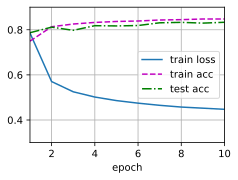

In [31]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


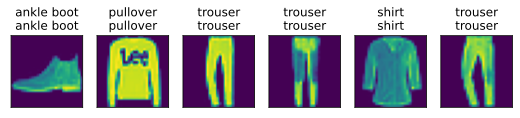

In [33]:
# prediction
def predict_ch3(net, test_iter, n = 6):
  """Predict labels (define din Chapter 3)."""
  for X, y in test_iter:
    break
  trues = d2l.get_fashion_mnist_labels(y)
  preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
  titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
  d2l.show_images(
      X[0:n].reshape((n, 28, 28)), 1, n, titles = titles[0:n]
  )
predict_ch3(net, test_iter)

## Summary
* With softmax regression, we can train models for multiclass classification.

* The training loop of softmax regression is very similar to that in linear regression: retrieve and read data, define models and loss functions, then train models using optimization algorithms. As you will soon find out, most common deep learning models have similar training procedures.

## 3.7 Concise Implementation of Softmax Regression

In [3]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [6]:
# Initializing Model Parameters
# PyTorch does not implicitly reshape the inputs. Thus we define the flatten layers to reshape the inputs before the linear layer in our network

net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std = 0.01)

net.apply(init_weights);

In [7]:
loss = nn.CrossEntropyLoss(reduction = 'none')
trainer = torch.optim.SGD(net.parameters(), lr = 0.1)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


RuntimeError: ignored

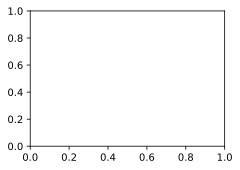

In [9]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## Summary
* Using high-level APIs, we can implement softmax regression much more concisely.
* From a computational perspective, implementing softmax regression has intricacies. Note that in many cases, a deep learning framework takes additional precautions beyond these most well-known tricks to ensure numrical stability, saving us from even more pitfalls that we would encounter if we tried to code all of our models from scartch in parctice.